In [49]:
import pandas as pd 
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.


In [13]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.head(20)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [15]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
# convert label to a numerical variable
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [18]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

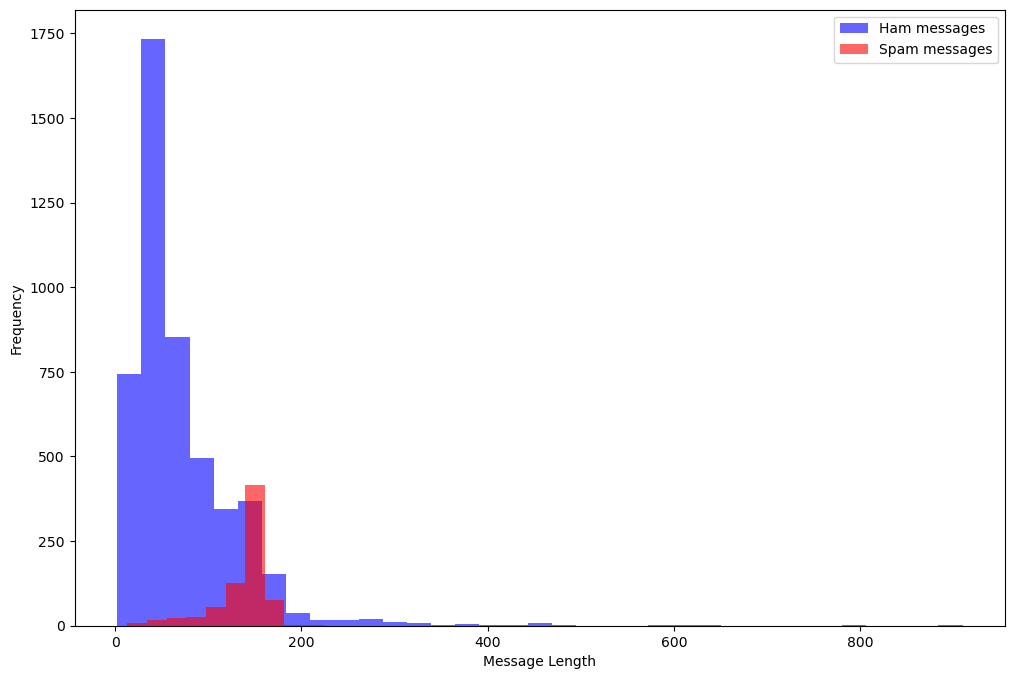

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [23]:
df[df.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [27]:
df[df.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [50]:
# Preprocessing function
def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [70]:
# Apply preprocessing to the message column
df['processed_message'] = df['message'].apply(text_process)

# Check the output of the preprocessing step
print(df['processed_message'].head())

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(df['processed_message'])

# Convert to DataFrame for better readability
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show the first few rows of the transformed data
print(bow_df.head())

0    Go jurong point crazy Available bugis n great ...
1                                Ok lar Joking wif oni
2    Free entry wkly comp win FA Cup final tkts 21s...
3                      dun say early hor c already say
4               Nah think goes usf lives around though
Name: processed_message, dtype: object
   008704050406  0089my  0121  01223585236  01223585334  0125698789  02  \
0             0       0     0            0            0           0   0   
1             0       0     0            0            0           0   0   
2             0       0     0            0            0           0   0   
3             0       0     0            0            0           0   0   
4             0       0     0            0            0           0   0   

   020603  0207  02070836089  ...  ìï  ìïll  ûthanks  ûªm  ûªt  ûªve  ûï  \
0       0     0            0  ...   0     0        0    0    0     0   0   
1       0     0            0  ...   0     0        0    0    0     0   0   
2      

In [71]:
df.head()

,label,message,label_num,message_len,processed_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [72]:
from collections import Counter
from nltk import ngrams

def get_frequent_ngrams(messages, n=1, top_k=10):
    all_words = []
    for message in messages:
        all_words.extend(text_process(message))
    
    if n == 1:
        ngrams_list = all_words
    else:
        ngrams_list = list(ngrams(all_words, n))
    
    return Counter(ngrams_list).most_common(top_k)

# Separate the data by class
ham_messages = df[df['label'] == 'ham']['message']
spam_messages = df[df['label'] == 'spam']['message']



In [73]:
# Find the top 10 frequent words, bigrams, and trigrams for each class
top_10_ham_words = get_frequent_ngrams(ham_messages, n=1)


In [74]:
print("Top 10 frequent words in ham messages:", top_10_ham_words)

Top 10 frequent words in ham messages: [(' ', 32597), ('e', 19824), ('a', 13516), ('t', 12685), ('o', 11992), ('n', 11689), ('i', 10892), ('s', 10877), ('l', 10083), ('r', 9546)]


In [75]:
top_10_spam_words = get_frequent_ngrams(spam_messages, n=1)

In [76]:
print("Top 10 frequent words in spam messages:", top_10_spam_words)

Top 10 frequent words in spam messages: [(' ', 11141), ('e', 5816), ('t', 3556), ('a', 3452), ('o', 3208), ('0', 3088), ('l', 2925), ('n', 2883), ('r', 2864), ('i', 2863)]


In [77]:
top_10_ham_bigrams = get_frequent_ngrams(ham_messages, n=2)

In [78]:
print("Top 10 frequent bigrams in ham messages:", top_10_ham_bigrams)

Top 10 frequent bigrams in ham messages: [(('e', ' '), 4964), (('t', ' '), 4169), (('i', 'n'), 3682), (('s', ' '), 3246), ((' ', 's'), 2882), (('y', ' '), 2686), (('d', ' '), 2556), (('n', 'g'), 2439), ((' ', 't'), 2232), ((' ', 'l'), 2155)]


In [79]:
top_10_spam_bigrams = get_frequent_ngrams(spam_messages, n=2)

In [80]:
print("Top 10 frequent bigrams in spam messages:", top_10_spam_bigrams)

Top 10 frequent bigrams in spam messages: [(('e', ' '), 1430), (('t', ' '), 1102), (('s', ' '), 1064), ((' ', 'c'), 849), (('i', 'n'), 802), (('e', 'r'), 751), (('0', '0'), 745), (('d', ' '), 713), (('a', 'l'), 677), (('r', 'e'), 665)]


In [81]:
top_10_ham_trigrams = get_frequent_ngrams(ham_messages, n=3)

In [82]:
print("Top 10 frequent trigrams in ham messages:", top_10_ham_trigrams)

Top 10 frequent trigrams in ham messages: [(('i', 'n', 'g'), 2137), (('n', 'g', ' '), 1837), (('l', 'l', ' '), 1002), (('e', 'd', ' '), 923), (('n', 't', ' '), 912), ((' ', 'g', 'o'), 826), (('e', 'r', ' '), 777), (('a', 'y', ' '), 735), ((' ', 'c', 'o'), 732), ((' ', 'c', 'a'), 659)]


In [83]:
top_10_spam_trigrams = get_frequent_ngrams(spam_messages, n=3)

In [84]:
print("Top 10 frequent trigrams in spam messages:", top_10_spam_trigrams)



Top 10 frequent trigrams in spam messages: [(('a', 'l', 'l'), 428), (('l', 'l', ' '), 374), (('e', 'r', ' '), 373), ((' ', 'c', 'a'), 317), (('e', 'd', ' '), 307), (('0', '0', ' '), 300), ((' ', 'å', '£'), 288), (('x', 't', ' '), 284), (('i', 'n', 'g'), 273), ((' ', '0', '8'), 252)]


In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Combine all ham and spam messages for word clouds
ham_text = ' '.join(ham_messages.apply(lambda x: ' '.join(text_process(x))))
spam_text = ' '.join(spam_messages.apply(lambda x: ' '.join(text_process(x))))




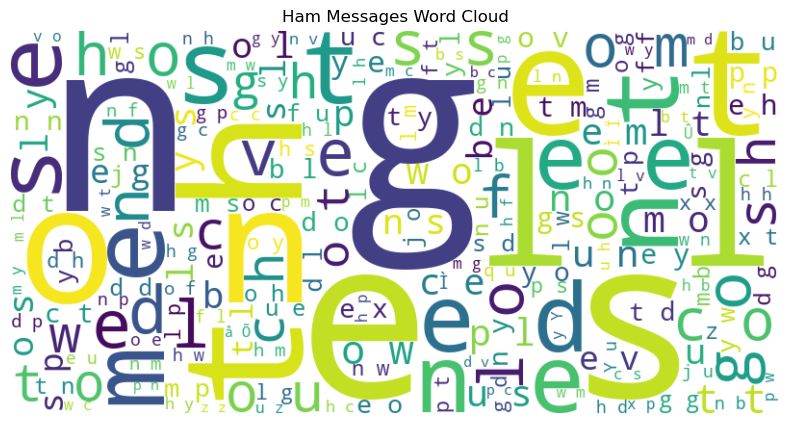

In [86]:
# Plot word clouds
plot_wordcloud(ham_text, 'Ham Messages Word Cloud')


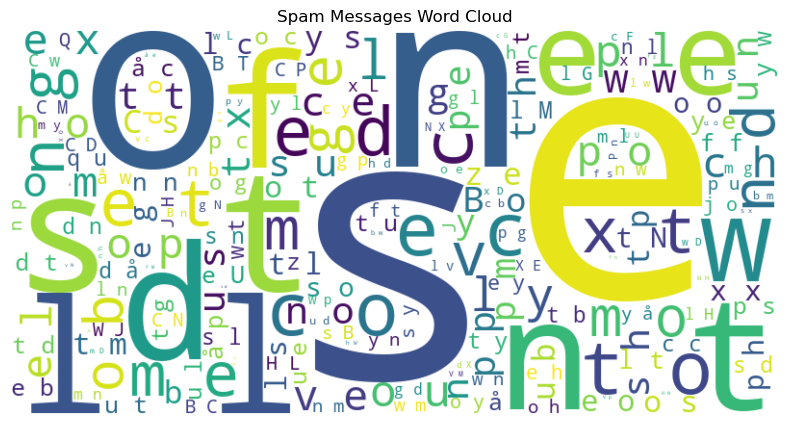

In [87]:
plot_wordcloud(spam_text, 'Spam Messages Word Cloud')

In [88]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk import ngrams
import nltk

In [90]:
type(stopwords.words('english'))


list

In [93]:
from collections import Counter

df['clean_msg'] = df.message.apply(text_process)

df.head()

words = df[df.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [95]:
words = df[df.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


In [96]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = df.clean_msg
y = df.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


In [102]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train_dtm, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_dtm)

# Evaluate the model using the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)


F1-Score: 0.9380530973451328


In [106]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

# Instantiate the vectorizer
vect = CountVectorizer()

# Fit and transform the training data
X_train_dtm = vect.fit_transform(X_train)

# Transform the testing data using the fitted vocabulary
X_test_dtm = vect.transform(X_test)

# Instantiate the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the training data
X_train_tfidf = tfidf_transformer.fit_transform(X_train_dtm)

# Transform the testing data
X_test_tfidf = tfidf_transformer.transform(X_test_dtm)

# Instantiate the classifier
clf = MultinomialNB()

# Train the classifier on the training data
clf.fit(X_train_tfidf, y_train)




MultinomialNB()

In [107]:

# Make predictions on the testing data
y_pred = clf.predict(X_test_tfidf)

In [108]:

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

In [109]:
print(f'F1 Score: {f1}')

F1 Score: 0.964866164232531


In [110]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [111]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure NLTK data is downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove email-ids
    text = re.sub(r'\S+@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lower case
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreeshnadgouda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [114]:
# Sample data for demonstration purposes
X_train = ["This is a sample email@example.com text with a URL http://example.com and some HTML <b>bold</b> tags, numbers 12345, and punctuation!"]
X_test = ["Testing preprocessing on this text with another email: test@example.com and URL: https://test.com"]

# Preprocess the training and testing data
X_train_preprocessed = [preprocess_text(text) for text in X_train]
X_test_preprocessed = [preprocess_text(text) for text in X_test]

print(X_train_preprocessed)
print(X_test_preprocessed)


['sample text url html bold tag number punctuation']
['testing preprocessing text another email url']


In [115]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Instantiate the vectorizer
vect = CountVectorizer()

# Fit and transform the training data
X_train_dtm = vect.fit_transform(X_train_preprocessed)

# Transform the testing data using the fitted vocabulary
X_test_dtm = vect.transform(X_test_preprocessed)

# Instantiate the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the training data
X_train_tfidf = tfidf_transformer.fit_transform(X_train_dtm)

# Transform the testing data
X_test_tfidf = tfidf_transformer.transform(X_test_dtm)

# Examine the document-term matrix
print(type(X_train_tfidf), X_train_tfidf.shape)
print(type(X_test_tfidf), X_test_tfidf.shape)



<class 'scipy.sparse._csr.csr_matrix'> (1, 8)
<class 'scipy.sparse._csr.csr_matrix'> (1, 8)
